In [ ]:
from google.colab import files
upload = files.upload()

Saving FDA_Project_1_city.csv to FDA_Project_1_city.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('FDA_Project_1_city.csv')

In [ ]:
df.head()

,Region,City,Phi,Ordered_streets_entropy,Weighted_streets_entropy,Avg_street_segment_length,Circuity,Avg_node_degree,Prop_of_dead_ends,Prop_of_4way_intersections
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


In [ ]:
df.dtypes

Region                         object
City                           object
Phi                           float64
Ordered_streets_entropy       float64
Weighted_streets_entropy      float64
Avg_street_segment_length     float64
Circuity                      float64
Avg_node_degree               float64
Prop_of_dead_ends             float64
Prop_of_4way_intersections    float64
dtype: object

Firstly let us do the preprocessing

In [ ]:
# 1. Preprocess the Data
# Checking  for missing values
print(df.isnull().sum())

Region                        0
City                          0
Phi                           0
Ordered_streets_entropy       0
Weighted_streets_entropy      0
Avg_street_segment_length     0
Circuity                      0
Avg_node_degree               0
Prop_of_dead_ends             0
Prop_of_4way_intersections    0
dtype: int64


In [ ]:
numerical_cols = ['Phi', 'Ordered_streets_entropy', 'Weighted_streets_entropy', 'Avg_street_segment_length', 'Circuity', 'Avg_node_degree', 'Prop_of_dead_ends', 'Prop_of_4way_intersections']

This code converts the specified columns in the DataFrame to numerical types using pd.to_numeric, and if there are any values that cannot be converted, it replaces them with NaN. This is a common technique to handle non-numeric or problematic values in numerical columns.

In [ ]:
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

Region                         object
City                           object
Phi                           float64
Ordered_streets_entropy       float64
Weighted_streets_entropy      float64
Avg_street_segment_length     float64
Circuity                      float64
Avg_node_degree               float64
Prop_of_dead_ends             float64
Prop_of_4way_intersections    float64
dtype: object

In [ ]:
df.head()

,Region,City,Phi,Ordered_streets_entropy,Weighted_streets_entropy,Avg_street_segment_length,Circuity,Avg_node_degree,Prop_of_dead_ends,Prop_of_4way_intersections
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


Let's start by checking if scaling is necessary for this dataset by examining the variance of the numerical features, which will inform us about the potential need for normalization or scaling.

**4th question Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering**

The dataset has been successfully scaled, ensuring that all numerical features have been standardized to have a mean of 0 and a standard deviation of 1. This scaling is crucial for clustering algorithms like K-means and Hierarchical clustering, as it ensures that each feature contributes equally to the distance calculations, preventing features with larger scales from dominating the clustering process

Variance gives you an idea of the spread or dispersion of values within each feature. Features with high variance might dominate the clustering process, especially in distance-based algorithms like K-means

In [ ]:
# Checking the variance of the numerical features to determine the need for scaling
df_variance = df[numerical_cols].var()


In [ ]:
# Display the variance of the numerical features
df_variance


Phi                             0.050359
Ordered_streets_entropy         0.104466
Weighted_streets_entropy        0.114189
Avg_street_segment_length     780.701919
Circuity                        0.000743
Avg_node_degree                 0.069872
Prop_of_dead_ends               0.006414
Prop_of_4way_intersections      0.015909
dtype: float64

**5th Question Do we need to use scaling techniques for this dataset?**
Due to this variance discrepancy, it's a good idea to proceed with scaling before applying clustering algorithms. This ensures that all features contribute more equally to the clustering process and prevents features with larger variances from dominating

StandardScaler standardizes the features by removing the mean and scaling to unit variance. It's suitable for data that approximates a normal distribution and is less affected by outliers.

MinMaxScaler scales the features to a specific range (typically [0, 1]) by subtracting the minimum value and dividing by the range. It's suitable when your data has varying ranges and may be sensitive to outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initializing the StandardScaler
scaler = StandardScaler()


In [ ]:
# Scaling the numerical features
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])


In [ ]:
# Display the first few rows of the scaled dataset to verify
df_scaled.head()


,Region,City,Phi,Ordered_streets_entropy,Weighted_streets_entropy,Avg_street_segment_length,Circuity,Avg_node_degree,Prop_of_dead_ends,Prop_of_4way_intersections
0,Asia/Oceania,Bangkok,-0.330477,0.353647,0.335401,-0.661487,0.111372,-2.045566,2.665745,-0.956809
1,Asia/Oceania,Beijing,0.699605,-0.541898,-0.396254,3.399520,-0.109897,0.235734,-0.157872,0.102948
2,Asia/Oceania,Hanoi,-0.755946,0.689477,0.692306,-0.668681,0.332640,-1.190078,1.235113,-1.004618
3,Asia/Oceania,Hong Kong,-0.746989,0.683258,0.665538,-0.790979,2.987859,0.034220,-0.421409,-0.430915
4,Asia/Oceania,Jakarta,-0.052803,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.344105,-1.052426


**1.	Implement K-means clustering on the scaled data and use the elbow method to determine the optimal number of clusters**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
# Implementing the elbow method to find the optimal number of clusters
inertia = []
range_values = range(1, 11)


In [ ]:
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled[numerical_cols])
    inertia.append(kmeans.inertia_)


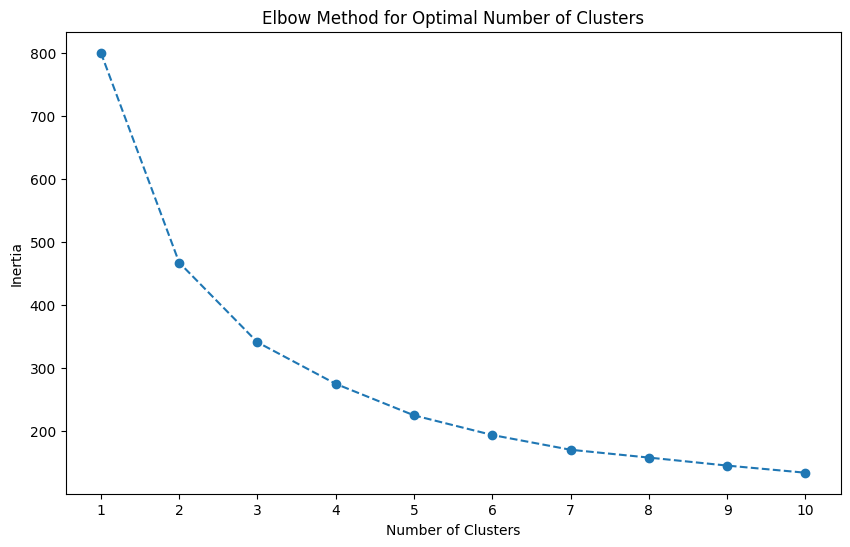

In [ ]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.show()


**Use elbow method to determine number of clusters**

Based on the elbow method graph we've got above, the optimal number of clusters k is typically chosen at the point where the inertia begins to decrease more slowly. This point is known as the "elbow" because the inertia graph starts to resemble an arm with a bent elbow.

In our graph, the elbow seems to appear around k=4. After
k=4, the inertia decreases at a slower rate, indicating that increasing the number of clusters beyond this point doesn't provide substantial gains in minimizing within-cluster variance.

Therefore, k=4 would be a reasonable choice for the optimal number of clusters to use in our K-means clustering algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    40
3    37
1    14
2     9
Name: Cluster, dtype: int64


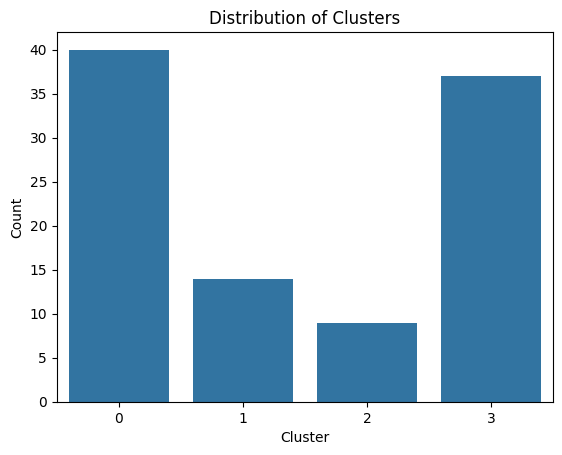

In [ ]:
# Assuming 'n_clusters_optimal' is the optimal number of clusters identified from the elbow method
n_clusters_optimal = 4

kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=0)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[numerical_cols])

# Checking the distribution of cities among the clusters
cluster_distribution = df_scaled['Cluster'].value_counts()
print(cluster_distribution)

# Visualize the distribution of clusters
import seaborn as sns

# Plot the distribution of clusters
sns.countplot(x='Cluster', data=df_scaled)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


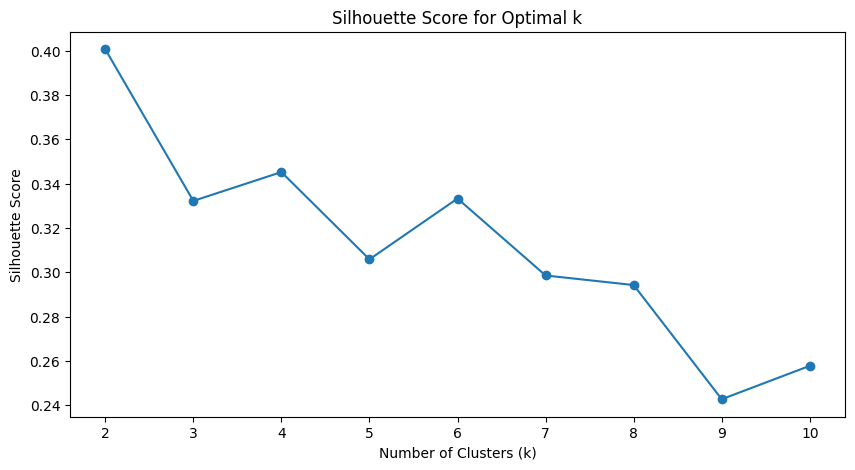

In [ ]:
# Initialize lists to store WCSS and silhouette scores
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Range of clusters to try
k_range = range(2, 11)

# Iterate over different values of k
for k in k_range:
    # Fit KMeans clustering
    # kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

    kmeans.fit(df_scaled[numerical_cols])

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(df_scaled[numerical_cols], kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.show()

**Without PCA Views**

In [ ]:
centers = kmeans.cluster_centers_


In [ ]:
centers

array([[-0.58441501,  0.55110244,  0.53876266, -0.25196947,  0.81943006,
        -0.952728  ,  0.92357375, -0.82752663],
       [ 0.92513556, -0.77822269, -0.84047255,  1.16013351, -0.12043314,
         0.13660643, -0.10588116,  0.19116601],
       [ 2.45323331, -2.5907346 , -2.56709392,  0.55789385, -1.19165241,
         1.36075334, -0.87318788,  1.77359198],
       [-0.31498371,  0.32885491,  0.35999877, -0.30227392, -0.55043964,
         0.64729325, -0.74599792,  0.39087604]])

In [ ]:
# For K-means
print('K-means Clustering:')
print(df_scaled[['Region', 'City', 'Cluster']].sort_values('Cluster'))



K-means Clustering:
                Region          City  Cluster
0         Asia/Oceania       Bangkok        0
69  Middle East/Africa       Nairobi        0
67  Middle East/Africa         Lagos        0
29              Europe        Dublin        0
30              Europe       Glasgow        0
..                 ...           ...      ...
26              Europe        Berlin        3
25              Europe     Barcelona        3
72           US/Canada     Baltimore        3
24              Europe        Athens        3
49       Latin America  Buenos Aires        3

[100 rows x 3 columns]


<ipython-input-30-be99e80520c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_scaled, palette='viridis')


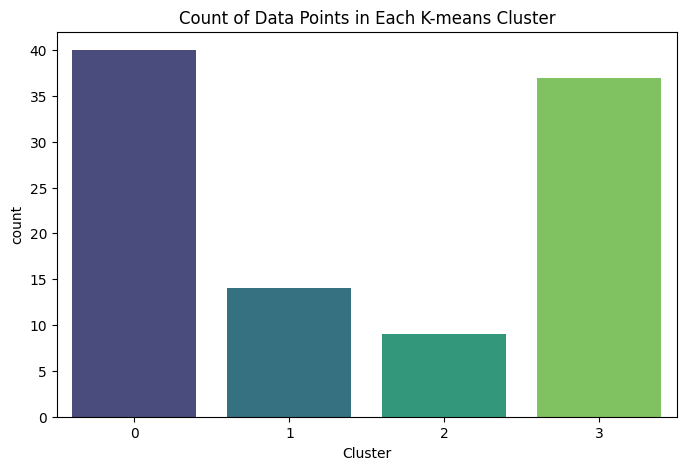

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_scaled, palette='viridis')
plt.title('Count of Data Points in Each K-means Cluster')
plt.show()


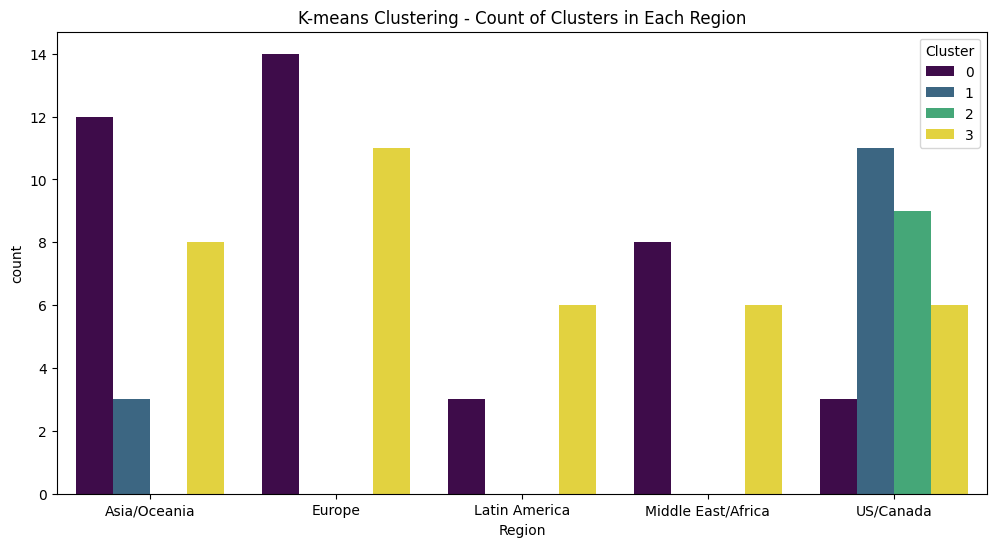

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', hue='Cluster', data=df_scaled, palette='viridis')
plt.title('K-means Clustering - Count of Clusters in Each Region')
plt.show()


Centroids of clusters:
[[-0.58441501  0.55110244  0.53876266 -0.25196947  0.81943006 -0.952728
   0.92357375 -0.82752663]
 [ 0.92513556 -0.77822269 -0.84047255  1.16013351 -0.12043314  0.13660643
  -0.10588116  0.19116601]
 [ 2.45323331 -2.5907346  -2.56709392  0.55789385 -1.19165241  1.36075334
  -0.87318788  1.77359198]
 [-0.31498371  0.32885491  0.35999877 -0.30227392 -0.55043964  0.64729325
  -0.74599792  0.39087604]]

Cluster distribution:
0    40
3    37
1    14
2     9
Name: Cluster, dtype: int64

Cluster profiles:
              Phi  Ordered_streets_entropy  Weighted_streets_entropy  \
Cluster                                                                
0       -0.584415                 0.551102                  0.538763   
1        0.925136                -0.778223                 -0.840473   
2        2.453233                -2.590735                 -2.567094   
3       -0.314984                 0.328855                  0.359999   

         Avg_street_segment_length  Cir

<ipython-input-28-c739c846b42a>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df_scaled.groupby('Cluster').mean()


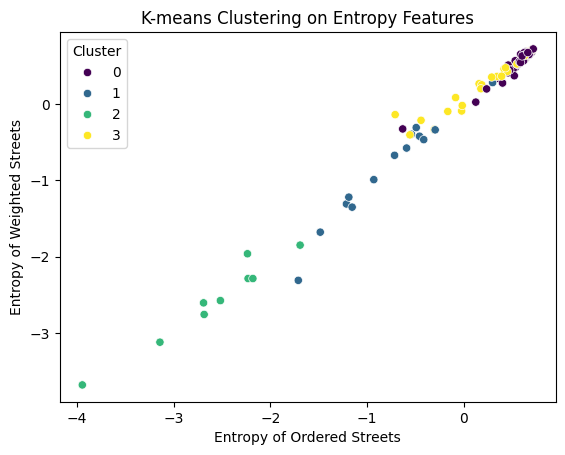

In [ ]:
# Cluster centers
centroids = kmeans.cluster_centers_
print("Centroids of clusters:")
print(centroids)

# Cluster distribution
cluster_distribution = df_scaled['Cluster'].value_counts()
print("\nCluster distribution:")
print(cluster_distribution)

# Profiling each cluster
cluster_profiles = df_scaled.groupby('Cluster').mean()
print("\nCluster profiles:")
print(cluster_profiles)

# Using Entropy_Ordered and Entropy_Weighted for the scatter plot visualization
sns.scatterplot(data=df_scaled, x='Ordered_streets_entropy', y='Weighted_streets_entropy', hue='Cluster', palette='viridis')
plt.title('K-means Clustering on Entropy Features')
plt.xlabel('Entropy of Ordered Streets')
plt.ylabel('Entropy of Weighted Streets')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Get the cluster assignments for each data point
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


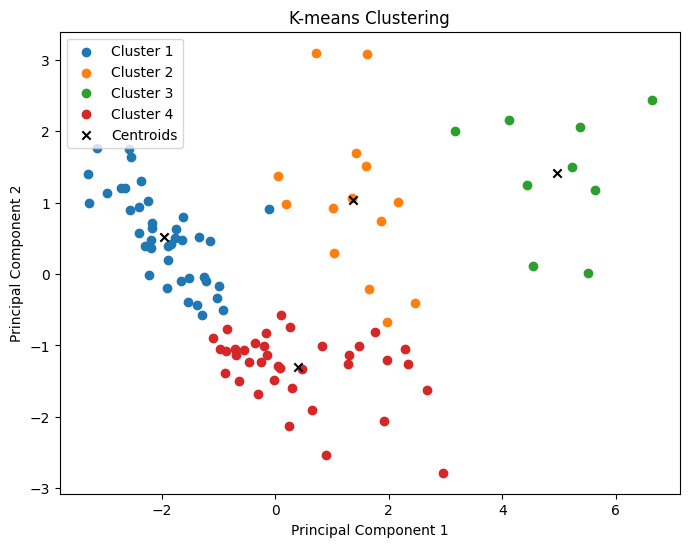

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled[numerical_cols])

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters_optimal):
    cluster_points = principal_components[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Plot the cluster centroids
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', color='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**Hierarchical clustering**

In [ ]:
import numpy as np
numerical_data = df_scaled[numerical_cols].select_dtypes(include=[np.number])


Cluster counts for method single:
1    100
Name: Cluster, dtype: int64


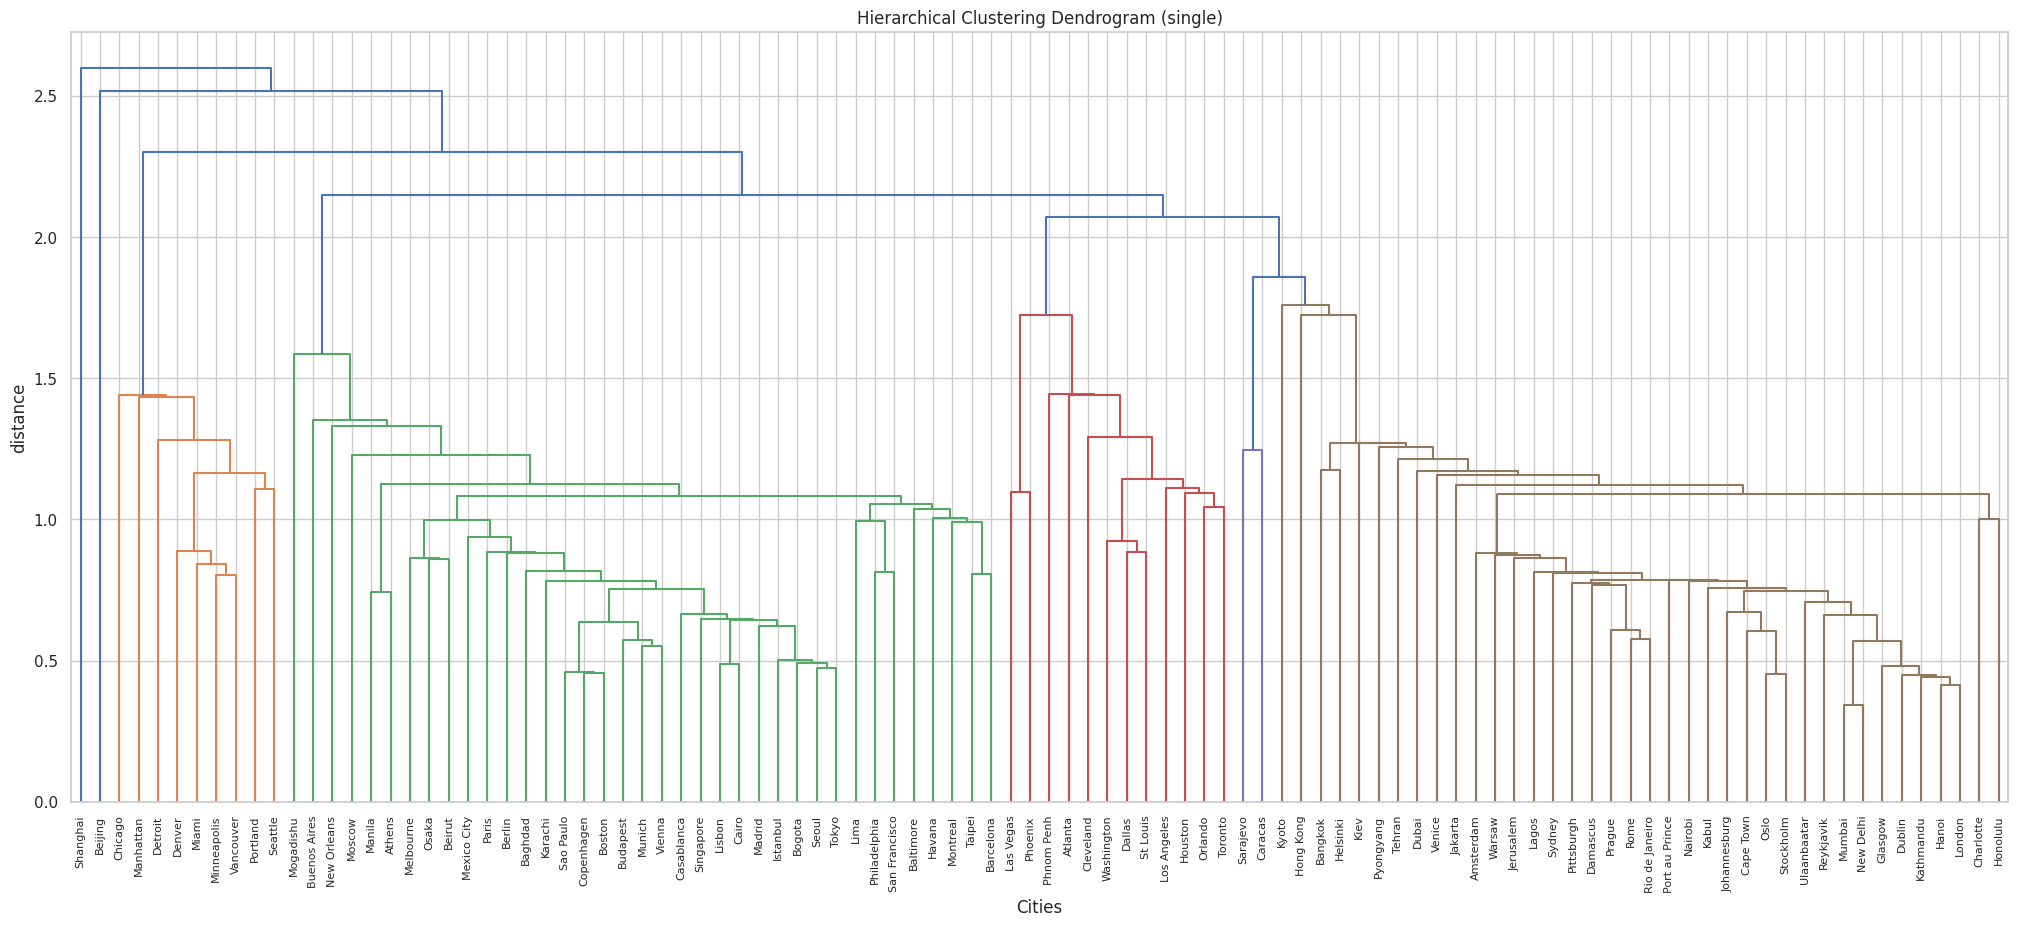


Cluster counts for method average:
3    89
1     9
2     2
Name: Cluster, dtype: int64


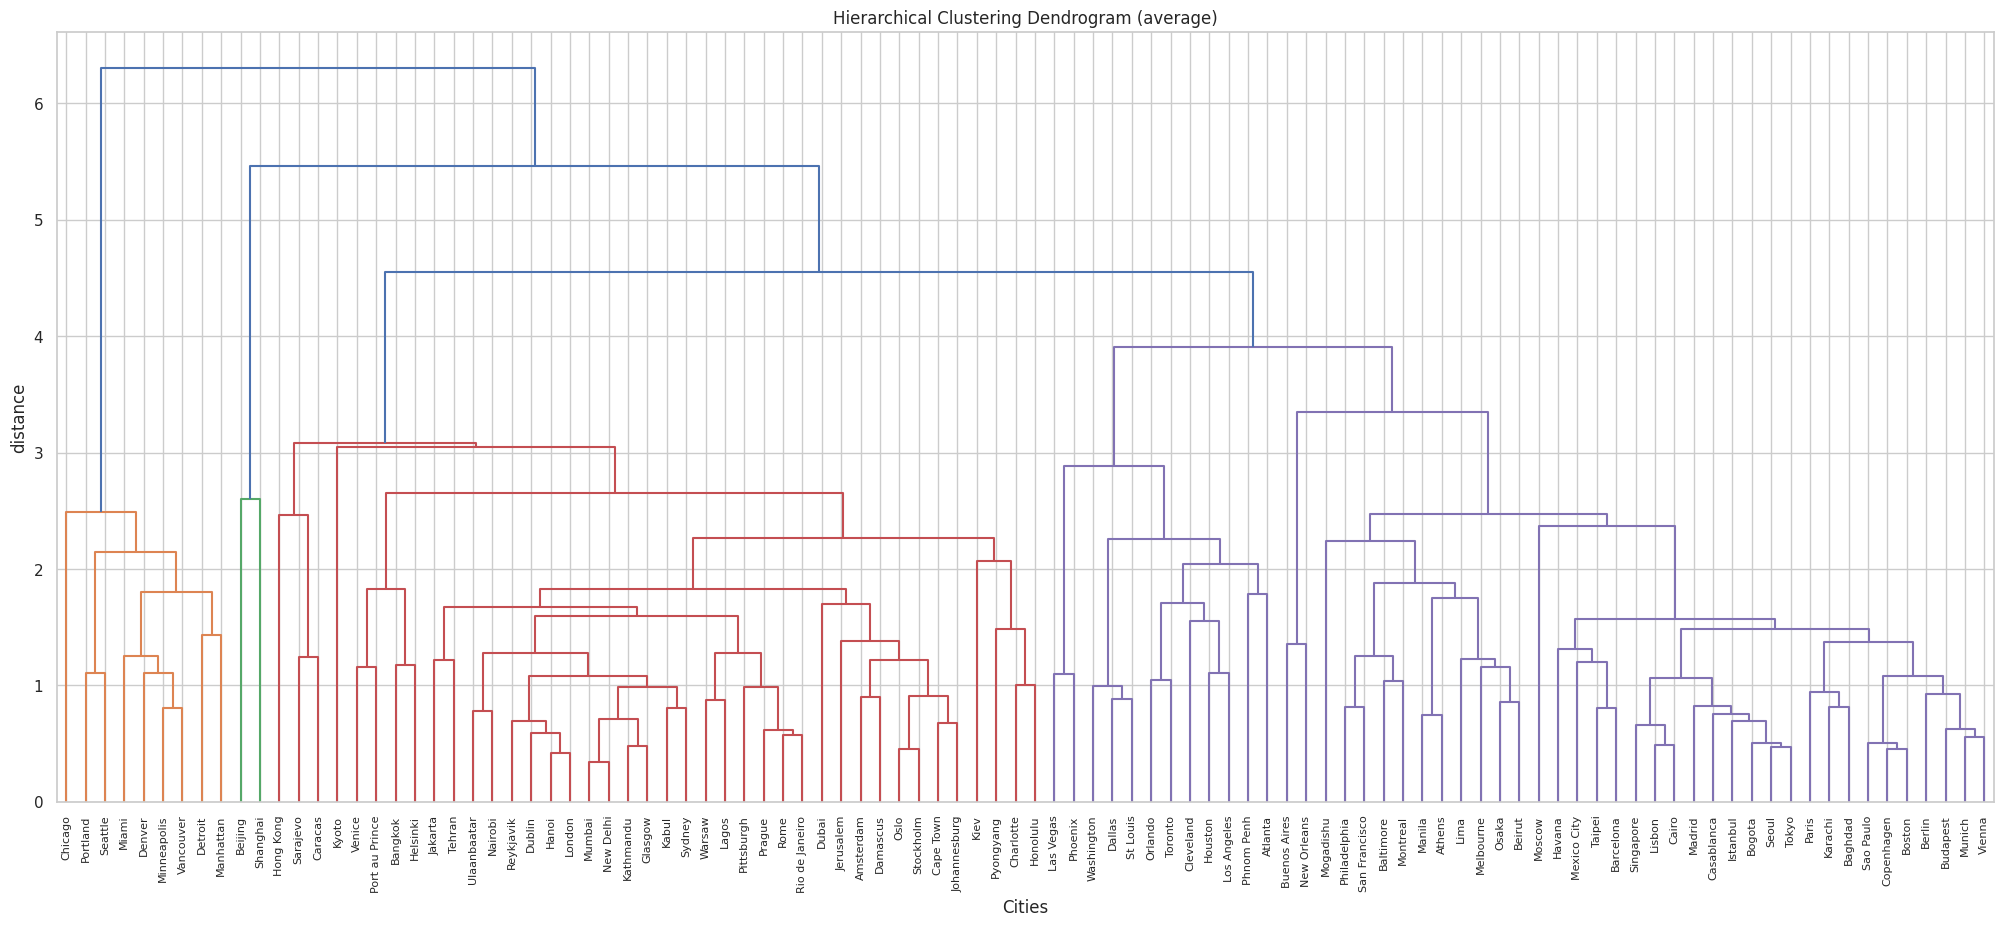


Cluster counts for method complete:
6    26
3    21
4    18
2    13
7    11
1     9
5     2
Name: Cluster, dtype: int64


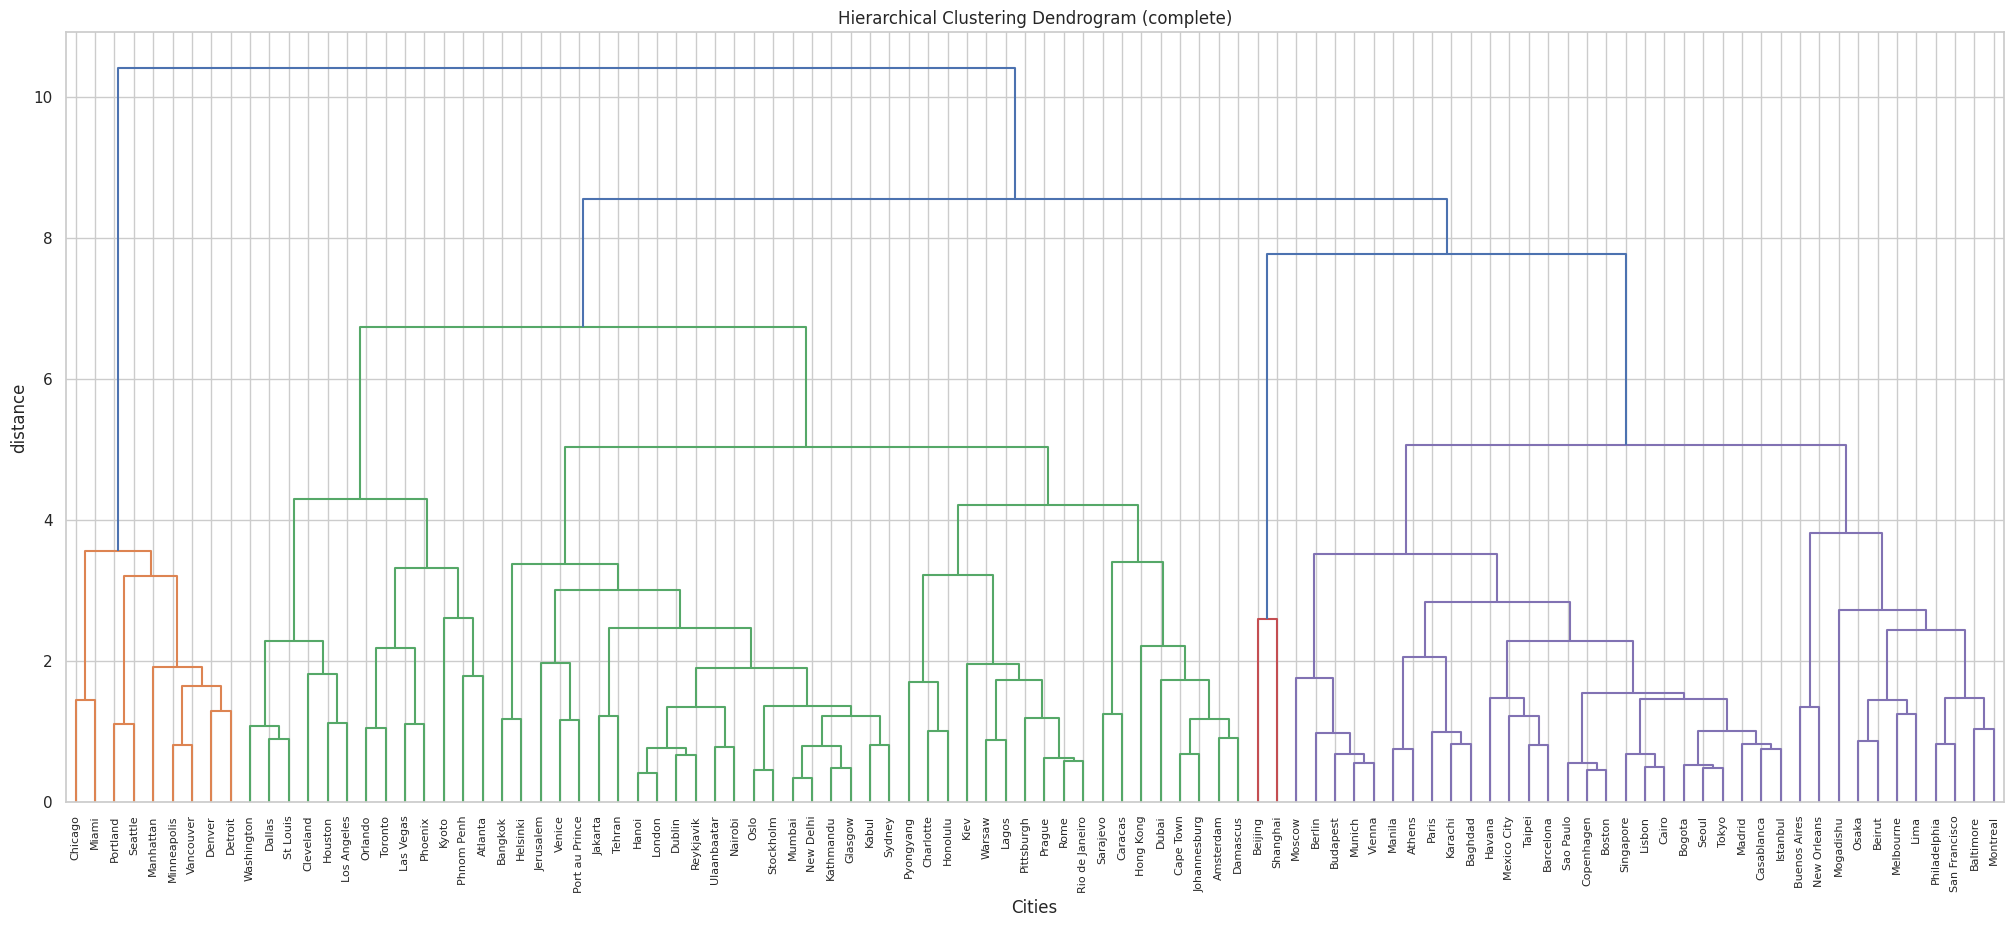


Cluster counts for method ward:
5    26
1    16
9    12
6    11
4    10
3     9
7     9
2     5
8     2
Name: Cluster, dtype: int64


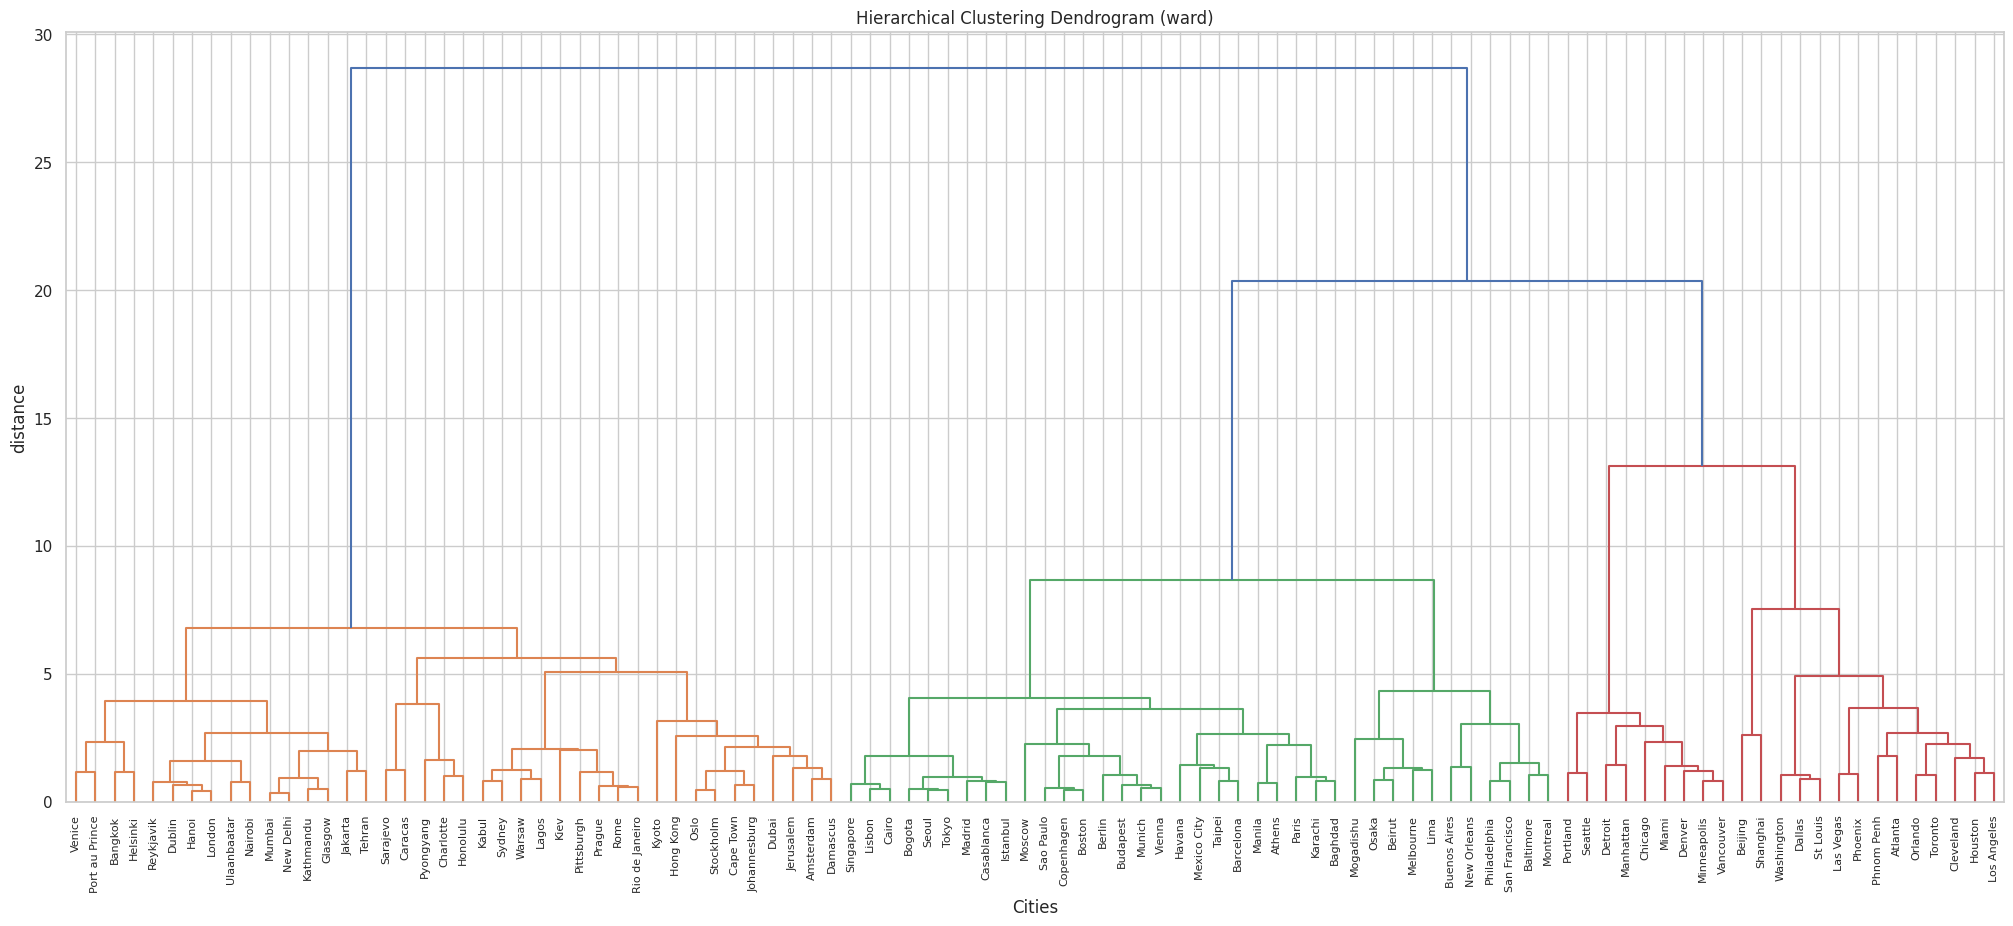

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

def hierarchical_clustering_and_dendrogram(data, labels, method, threshold=None, num_clusters=None):
    # Linkage matrix
    Z = linkage(data, method=method)

    # Generate clustering solution
    if threshold is not None:
        clusters = fcluster(Z, threshold, criterion='distance')
    elif num_clusters is not None:
        clusters = fcluster(Z, num_clusters, criterion='maxclust')
    else:
        # You can choose either threshold or num_clusters based on our preference
        # For example, setting threshold=5.0 or num_clusters=3
        clusters = fcluster(Z, 5.0, criterion='distance')

    # Add the cluster labels to the original dataframe
    df_with_clusters = pd.DataFrame(data.copy())
    df_with_clusters['Cluster'] = clusters

    # Print information about the clusters
    cluster_counts = df_with_clusters['Cluster'].value_counts()
    print(f'\nCluster counts for method {method}:\n{cluster_counts}')

    # Plotting dendrogram
    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({method})')
    plt.xlabel('Cities')
    plt.ylabel('distance')
    dendrogram(
        Z,
        labels=labels,
        leaf_rotation=90.,
        leaf_font_size=8.,
    )
    plt.show()

    return df_with_clusters

# You would call this function like this:
city_names = df['City'].values


for method in methods:
    df_with_clusters = hierarchical_clustering_and_dendrogram(numerical_data, city_names, method, threshold=5.0)



scatterplots the cities in these two dimensions: the t-SNE projection preserves their cluster structure relatively well despite inherent information loss, but, given the global density-equalizing nature of the algorithm, the relative distances within and between clusters are not preserved in the embedding and should not be interpreted otherwise.

In [ ]:
# Assuming 'Country' is the name of the column that holds the country of each city
us_canadian_cities = df['Region'].apply(lambda x: x in ['US/Canada'])


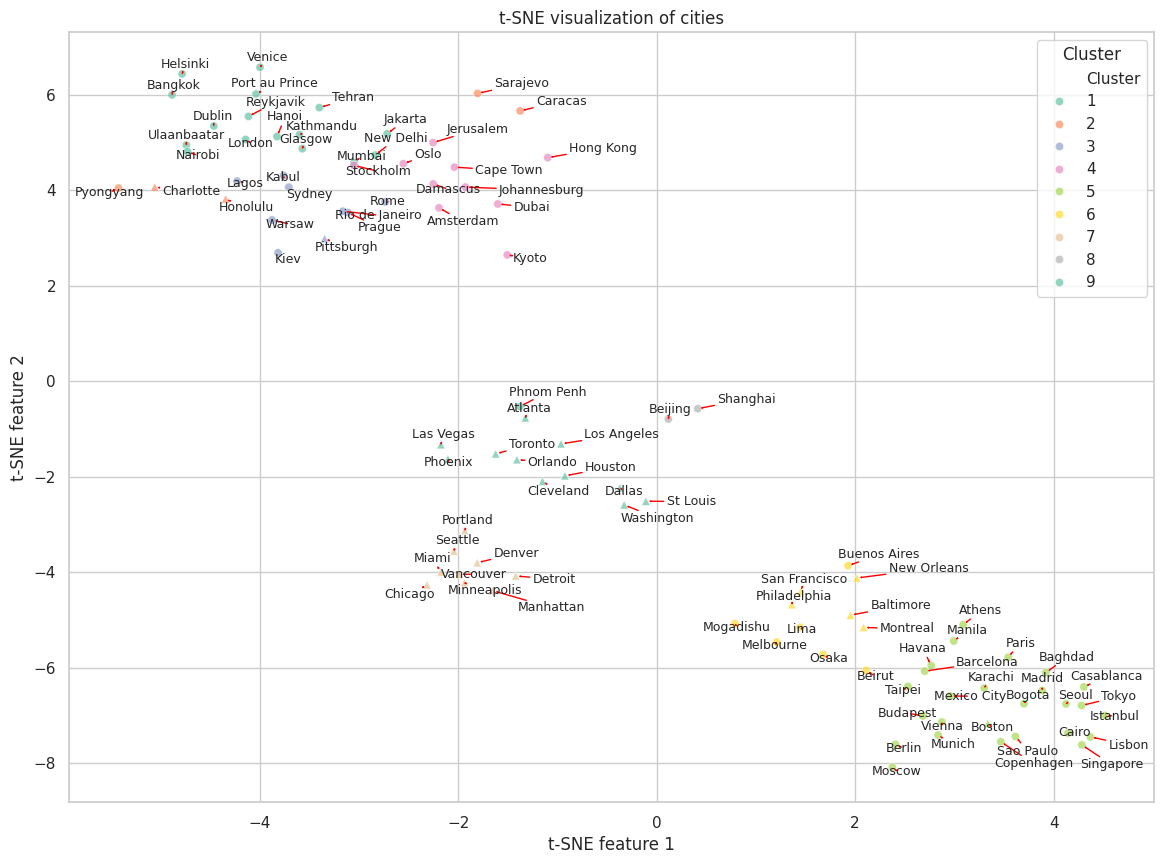

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Assuming 'Country' is the name of the column that holds the country of each city
us_canadian_cities = df['Region'].apply(lambda x: x in ['US/Canada'])

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(numerical_data)

# Create a new DataFrame for the t-SNE results
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['City'] = city_names
df_tsne['Cluster'] = df_with_clusters['Cluster']
df_tsne['Marker'] = us_canadian_cities.apply(lambda x: '^' if x else 'o')

# Plot settings
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Create the scatter plot
scatter = sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="Cluster",
    style="Marker",  # Use the Marker column for different shapes
    palette="Set2",
    data=df_tsne,
    legend="full",
    alpha=0.7,
    markers=['o', '^']  # Circle for others, Triangle for US/Canada
)

# Add city names to the plot
texts = []
for i, point in df_tsne.iterrows():
    texts.append(plt.text(point['TSNE1'], point['TSNE2'], point['City'],
              fontdict={'size': 9}))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('t-SNE visualization of cities')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Improve the legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles[:len(set(df_with_clusters['Cluster']))+1], labels[:len(set(df_with_clusters['Cluster']))+1],
           loc='best', title='Cluster')

# Show the plot
plt.show()


Conclusion : Most of the North American cities lie near each other in three adjacent clusters (Yellow, Brown and Green)